
# Breast Cancer Prediction

## Packages

In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so that entire datafraeme can be seen when printed
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

## Importing the data

In [2]:
# Loading the data
data = pd.read_csv("Datasets/210224-task-data.csv")

## Understanding the data

In [3]:
# Displaying the first 5 rows of the dataframe
data.head()

,case,ARM,AGE,BMI,density
0,1,1,38,21.8,40
1,0,1,43,32.3,5
2,0,1,46,23.0,45
3,0,2,52,19.6,40
4,0,1,59,26.2,40


In [4]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1065 rows and 5 columns.


In [5]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case     1065 non-null   int64  
 1   ARM      1065 non-null   int64  
 2   AGE      1065 non-null   int64  
 3   BMI      1049 non-null   float64
 4   density  1065 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 41.7 KB


In [6]:
# Converting data-type of categorical columns 
for col in ['case','ARM']:
    data[col]=data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   case     1065 non-null   category
 1   ARM      1065 non-null   category
 2   AGE      1065 non-null   int64   
 3   BMI      1049 non-null   float64 
 4   density  1065 non-null   int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 27.4 KB


- There are five numeric columns in the following data: case, ARM, AGE, BMI, and density. case and ARM, on the other hand, are categories. As a result, we'll make the necessary datatype changes to make EDA easier.

### Checking the statistical summary of the data

In [7]:
# Write the code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,1065.0,50.165258,6.213080,35.0,46.0,49.0,54.0,70.0
BMI,1049.0,26.717445,4.834623,17.6,23.2,25.7,29.4,50.4
density,1065.0,44.450704,30.175764,0.0,15.0,40.0,70.0,100.0


* `AGE` : Patients' average age is around 50 years, however the range is from 35 to 70 years. The median age is 49 years, which is around average. As a result, there aren't many outliers in age.
* `BMI` : The average BMI is 27. It varies between 17.6 and 50.4. The median(26) is also very close to the mean.
* `density` : 44 is the average density. It is between 0 and 100. In comparison to the mean, the median(40) is low. This indicates a right-skewed distribution of density.

## Data Preprocessing

### Checking for duplicate entries in the data

In [8]:
data.duplicated().sum()

8

- As we can see, there are 8 duplicate values in the dataset.

In [9]:
# print the duplicated rows in the dataframe 
data[data.duplicated(keep=False)] 

,case,ARM,AGE,BMI,density
20,0,2,47,25.5,40
77,0,1,45,21.6,70
114,0,1,46,25.5,80
128,0,2,48,22.6,80
149,0,1,46,25.5,80
200,0,2,48,32.0,0
348,0,2,48,32.0,0
503,0,1,45,21.6,70
584,0,2,52,30.8,20
646,0,1,48,22.3,70


In [10]:
data.drop_duplicates(keep='first', inplace=True)

In [11]:
data.shape

(1057, 5)

In [12]:
# filtering object type columns
cat_columns = data.describe(include=["category"]).columns
cat_columns

Index(['case', 'ARM'], dtype='object')

In [13]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print(data[i].value_counts(normalize=True) * 100)
    print("*" * 50)

Unique values in case are :
0    934
1    123
Name: case, dtype: int64
0    88.363292
1    11.636708
Name: case, dtype: float64
**************************************************
Unique values in ARM are :
1    554
2    503
Name: ARM, dtype: int64
1    52.412488
2    47.587512
Name: ARM, dtype: float64
**************************************************


- From the Unique values of case column, we can see that non-cancer controls(934) are significantly higher than the cancer cases(123). This is an imbalanced dataset.

### Checking for missing values in the data. If present, we will treat them using an appropriate method.

In [14]:
# Write the code here
data.isnull().sum()

case        0
ARM         0
AGE         0
BMI        16
density     0
dtype: int64

In [15]:
# filling missing values in the 'BMI' column with the median value of the column
data['BMI'].fillna(value=data.BMI.median(),inplace=True)

In [16]:
# checking for missing values in the dataframe after filling missing values
data.isnull().sum()

case       0
ARM        0
AGE        0
BMI        0
density    0
dtype: int64

In [17]:
# replace the value 1 in ARM column with placebo and 2 with tomaxifen 
data['ARM'].replace({1:'placebo', 2:'tamoxifen'}, inplace=True)

In [18]:
# save data to a new csv file into folder named Datasets
data.to_csv("Datasets/Analytical_Base_Table.csv", index=False)

In [19]:
# function to plot the distribution of the numerical columns in the dataframe
def plot_distribution(data, features):
    plt.figure(figsize=(10, 10))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i + 1)
        sns.histplot(data[feature], kde=True)
        plt.title(f"Distribution of {feature}")
        if feature == "density":
            plt.title("Distribution of Breast Density")
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        if feature == "density":
            plt.xlabel("Breast Density")
        else:
            plt.xlabel(feature)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

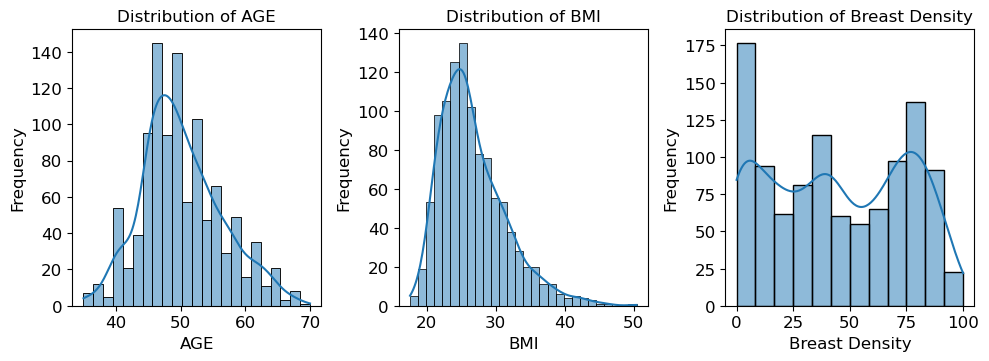

In [20]:
plot_distribution(data, data.describe().columns)

In [21]:
# function to plot boxplot of the numerical columns in the dataframe wrt the target variable case 
def plot_boxplot(data, features, target="case"):
    plt.figure(figsize=(9, 9))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=target, y=feature, data=data)
        # if feature name is density replace it with Breast Density
        if feature == "density":
            plt.title(f"Boxplot of Breast Density wrt {target}")
        else:
            plt.title(f"Boxplot of {feature} wrt {target}")
        plt.xticks(fontsize=9)
        plt.yticks(fontsize=9)
        plt.xlabel(target, fontsize=9)
        if feature == "density":
            plt.ylabel("Breast Density", fontsize=9)
        else:
            plt.ylabel(feature, fontsize=9)
    plt.tight_layout()
    plt.show()

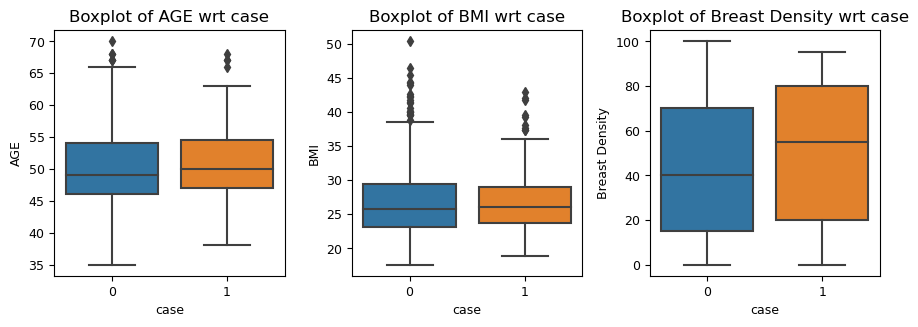

In [22]:
plot_boxplot(data, data.describe().columns)

In [23]:
def plot_histogram_boxplot(data, numerical_columns, target1="case"):
    """
    Plot histogram and boxplot for each numerical column in the dataframe
    data: dataframe
    numerical_columns: list of numerical columns in the dataframe
    target: target variable
    """

    for column in numerical_columns:
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        sns.histplot(data=data, x=column, kde=True, ax=axs[0], color="teal", stat="density")
        axs[0].set_xlabel(column, fontsize=12)
        axs[0].set_ylabel("Density", fontsize=12)
        axs[0].tick_params(axis='x', labelsize=12)
        axs[0].tick_params(axis='y', labelsize=12)

        sns.boxplot(data=data, x=target1, y=column, ax=axs[1], palette="gist_rainbow")
        axs[1].set_xlabel(target1, fontsize=12)
        axs[1].set_ylabel(column, fontsize=12)
        axs[1].tick_params(axis='x', labelsize=12)
        axs[1].tick_params(axis='y', labelsize=12)

        plt.tight_layout()
        plt.show()

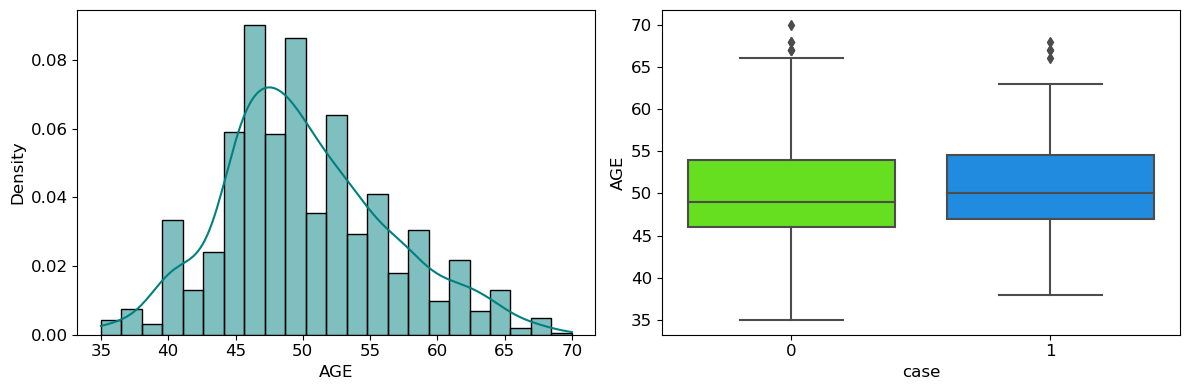

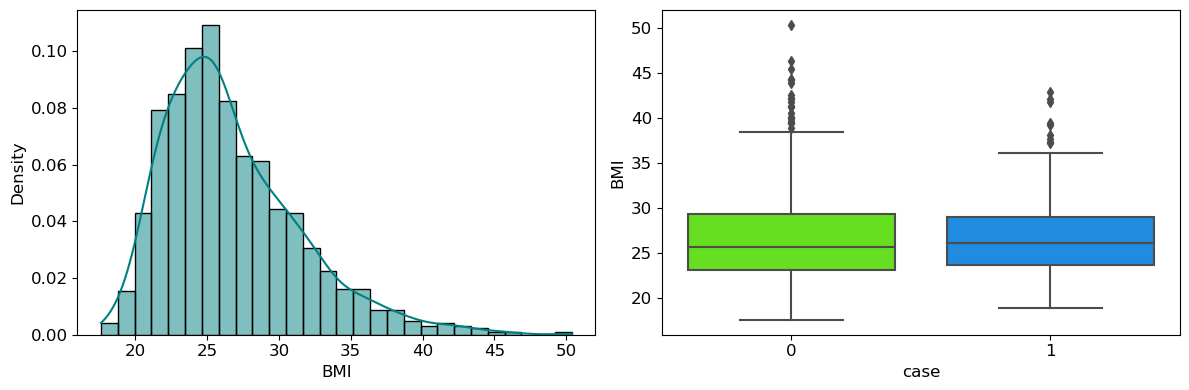

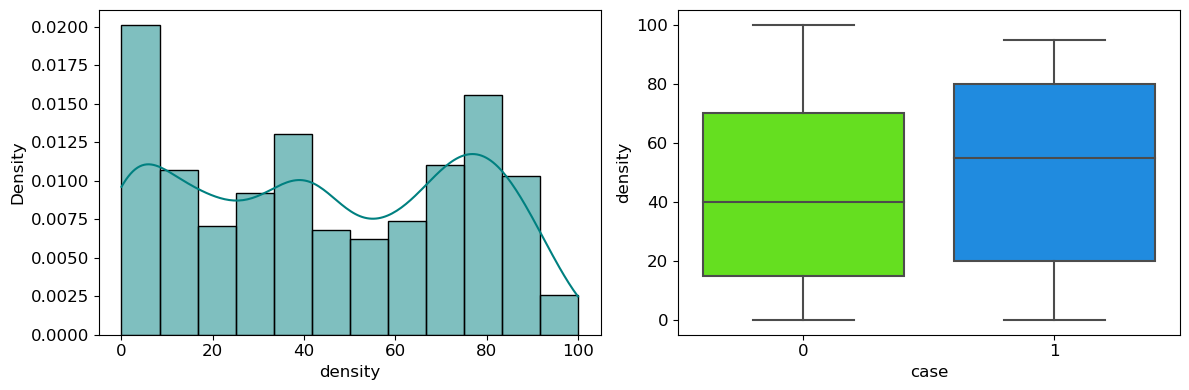

In [24]:
# list of numerical columns in the dataframe
numerical_columns = data.select_dtypes(include=[np.number]).columns
plot_histogram_boxplot(data, numerical_columns, target1="case")

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        color = 'b',
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [26]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [27]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [28]:
data.head()

,case,ARM,AGE,BMI,density
0,1,placebo,38,21.8,40
1,0,placebo,43,32.3,5
2,0,placebo,46,23.0,45
3,0,tamoxifen,52,19.6,40
4,0,placebo,59,26.2,40


In [29]:
# for case column replace 1 with cancer_cases and 0 with non_cancer_controls
data['case'] = data['case'].map({1: 'cancer_cases', 0: 'non_cancer_controls'})
data.head()

,case,ARM,AGE,BMI,density
0,cancer_cases,placebo,38,21.8,40
1,non_cancer_controls,placebo,43,32.3,5
2,non_cancer_controls,placebo,46,23.0,45
3,non_cancer_controls,tamoxifen,52,19.6,40
4,non_cancer_controls,placebo,59,26.2,40


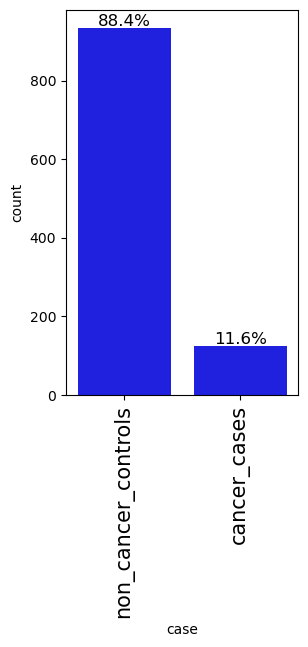

In [30]:
labeled_barplot(data, "case", perc=True)

- The distribution of the target variable case [non_cancer_controls vs cancer_cases] is imbalanced.
- We have 88.4% observations for non_cancer_controls and 11.6% observations for cancer_cases. This is an imbalanced dataset, because the number of observations in non_cancer_controls is much higher than the number of observations in cancer_cases.

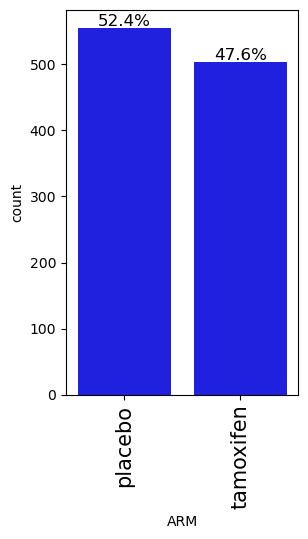

In [31]:
labeled_barplot(data, "ARM", perc=True)

- We have 52.4% observations for treatment arm placebo and 47.6% observations for treatment arm tamoxifen

ARM                  placebo  tamoxifen   All
case                                         
All                      554        503  1057
non_cancer_controls      482        452   934
cancer_cases              72         51   123
------------------------------------------------------------------------------------------------------------------------


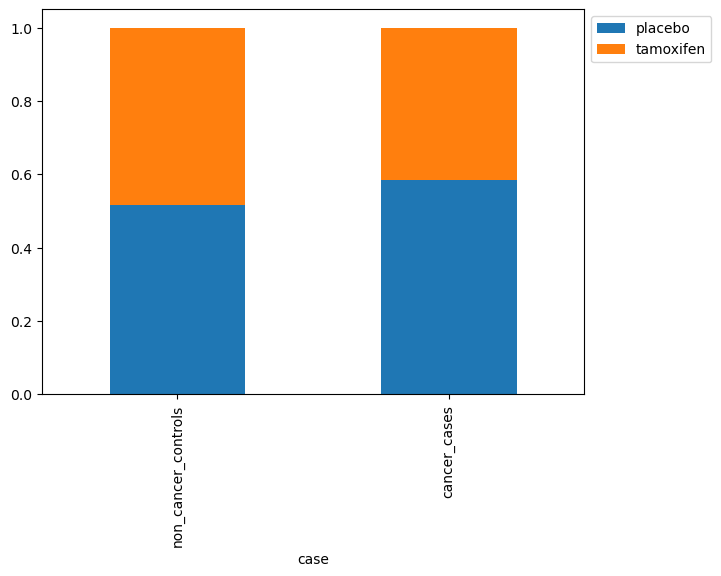

In [32]:
stacked_barplot(data, "case", "ARM")

- Out of 554 women treated with placebo, 482 are non_caner_controls and 72 are cancer_cases, which is 87% and 13% respectively. 
- Out of 503 women treated with tomoxifen, 452 are non_caner_controls and 51 are cancer_cases, which is 90% and 10% respectively.
- The percentage of non_cancer_controls is higher in both the groups.
- The percentage of cancer_cases is higher in the placebo group compared to the tomoxifen group.
- The percentage of non_cancer_controls is higher in the tomoxifen group compared to the placebo group.

In [33]:
import pandas as pd
import numpy as np
import os

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# # scikit-learn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer, make_column_transformer

# from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Function for creating model pipelines - imblearn
from imblearn.pipeline import make_pipeline as imbl_pipe

# # Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import ensemble as ada 

import joblib


## Load Analytical Base Table

In [34]:
df = pd.read_csv("./Datasets/Analytical_Base_Table.csv")
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (1057, 5)


,case,ARM,AGE,BMI,density
0,1,placebo,38,21.8,40
1,0,placebo,43,32.3,5
2,0,placebo,46,23.0,45
3,0,tamoxifen,52,19.6,40
4,0,placebo,59,26.2,40


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case     1057 non-null   int64  
 1   ARM      1057 non-null   object 
 2   AGE      1057 non-null   int64  
 3   BMI      1057 non-null   float64
 4   density  1057 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 41.4+ KB


Let us check which of these differences are statistically significant.

## was breast density a risk factor for breast cancer in this case-control study?

In [36]:
# t-test for breast density and breast cancer risk 
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(df[df['case'] == 1]['density'], df[df['case'] == 0]['density']) 
print("T-statistic:", t_stat) 
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject the null hypothesis and conclude that breast density is a risk factor for breast cancer")
else:
    print("Fail to reject the null hypothesis and conclude that breast density is not a risk factor for breast cancer")


T-statistic: 2.393559220166945
P-value: 0.016859701968785636
Reject the null hypothesis and conclude that breast density is a risk factor for breast cancer


## Assess the relationship between breast density and two standard demographic risk factors: age and body mass index.

In [37]:
# t-test to check the relationship between density and age
t_stat, p_val = ttest_ind(df['AGE'], df['density'])
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    if t_stat > 0:
        print("Reject the null hypothesis and conclude that there is a significant relationship between breast density and age")
        print("The relationship is positive, which means that as age increases, breast density also increases and vice versa")
    else:
        print("Reject the null hypothesis and conclude that there is a significant relationship between breast density and age")
        print("The relationship is negative, which means that as age increases, breast density decreases and vice versa")
else:
    print("Fail to reject the null hypothesis and conclude that there is no significant relationship between breast density and age")

T-statistic: 6.079342875546415
P-value: 1.4280939448017185e-09
Reject the null hypothesis and conclude that there is a significant relationship between breast density and age
The relationship is positive, which means that as age increases, breast density also increases and vice versa


In [38]:
# t-test to check the relationship between density and BMI
t_stat, p_val = ttest_ind(df['BMI'], df['density'])
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    if t_stat > 0:
        print("Reject the null hypothesis and conclude that there is a significant relationship between breast density and BMI")
        print("The relationship is positive, which means that as BMI increases, breast density also increases and vice versa")
    else:
        print("Reject the null hypothesis and conclude that there is a significant relationship between breast density and BMI")
        print("The relationship is negative, which means that as BMI increases, breast density decreases and vice versa")
else:
    print("Fail to reject the null hypothesis and conclude that there is no significant relationship between breast density and BMI")

T-statistic: -18.836294697660147
P-value: 2.7645017989212516e-73
Reject the null hypothesis and conclude that there is a significant relationship between breast density and BMI
The relationship is negative, which means that as BMI increases, breast density decreases and vice versa


In [39]:
from scipy.stats import ttest_ind
Ho = "Age has no effect on breast cancer"  # Stating the Null Hypothesis
Ha = "Age has an effect on breast cancer"  # Stating the Alternate Hypothesis

# Selecting the data for the two groups
cancer_cases = df[df["case"] == 1]["AGE"]
non_cancer_controls = df[df["case"] == 0]["AGE"]

# Performing an independent t-test
t_stat, p_val = ttest_ind(cancer_cases, non_cancer_controls)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p-value ({p_val}) < 0.05")
else:
    print(f"{Ho} as the p-value ({p_val}) > 0.05")

T-statistic: 1.241943847970177
P-value: 0.21453329635061777
Age has no effect on breast cancer as the p-value (0.21453329635061777) > 0.05


In [40]:
Ho = "BMI has no effect on breast cancer"  # Stating the Null Hypothesis
Ha = "BMI has an effect on breast cancer"  # Stating the Alternate Hypothesis

# Selecting the data for the two groups
cancer_cases = df[df["case"] == 1]["BMI"]
non_cancer_controls = df[df["case"] == 0]["BMI"]

# Performing an independent t-test
t_stat, p_val = ttest_ind(cancer_cases, non_cancer_controls)
print("T-statistic:", t_stat)

if p_val < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p-value ({p_val}) < 0.05")
else:
    print(f"{Ho} as the p-value ({p_val}) > 0.05")

T-statistic: 0.9019740599506024
BMI has no effect on breast cancer as the p-value (0.3672765188660677) > 0.05


In [41]:
Ho = "Breast density has no effect on breast cancer"  # Stating the Null Hypothesis
Ha = "Breast density has an effect on breast cancer"  # Stating the Alternate Hypothesis

# Selecting the data for the two groups
cancer_cases = df[df["case"] == 1]["density"]
non_cancer_controls = df[df["case"] == 0]["density"]

# Performing an independent t-test
t_stat, p_val = ttest_ind(cancer_cases, non_cancer_controls)
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p-value ({p_val}) < 0.05")
else:
    print(f"{Ho} as the p-value ({p_val}) > 0.05")

T-statistic: 2.393559220166945
P-value: 0.016859701968785636
Breast density has an effect on breast cancer as the p-value (0.016859701968785636) < 0.05


In [42]:
# use logistic regression to predict breast cancer using statmodels 
import statsmodels.api as sm

# Define the independent and dependent variables
X = df.drop(["case","ARM"], axis=1)
y = df["case"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Get the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.355286
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  739
Model:                          Logit   Df Residuals:                      735
Method:                           MLE   Df Model:                            3
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                 0.01955
Time:                        14:07:25   Log-Likelihood:                -262.56
converged:                       True   LL-Null:                       -267.79
Covariance Type:            nonrobust   LLR p-value:                   0.01495
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6530      1.318     -3.531      0.000      -7.236      -2.070
AGE            0.0240      0.

In [43]:
# print all the results as separate numbers like depicted in the summary table 
print("The coefficients of the model with the intercept are:", result.params)
print("The p-values of the coefficients are:", result.pvalues)
print("The confidence intervals of the coefficients are:", result.conf_int())
print("The Log-Likelihood of the model is:", result.llf) 

The coefficients of the model with the intercept are: const     -4.652996
AGE        0.024017
BMI        0.028682
density    0.013594
dtype: float64
The p-values of the coefficients are: const      0.000414
AGE        0.204576
BMI        0.274502
density    0.001820
dtype: float64
The confidence intervals of the coefficients are:                 0         1
const   -7.235595 -2.070396
AGE     -0.013088  0.061123
BMI     -0.022762  0.080126
density  0.005049  0.022138
The Log-Likelihood of the model is: -262.55631453223003


In [44]:
# get the odds ratio of the model 
print(np.exp(result.params))

const      0.009533
AGE        1.024308
BMI        1.029097
density    1.013687
dtype: float64


In [45]:
# calculate confidence intervals of the odds ratio 
params = result.params
conf = result.conf_int()
conf['Odds_Ratio'] = params
conf.columns = ['2.5%', '97.5%', 'Odds_Ratio']
print(np.exp(conf))

             2.5%     97.5%  Odds_Ratio
const    0.000720  0.126136    0.009533
AGE      0.986997  1.063029    1.024308
BMI      0.977495  1.083423    1.029097
density  1.005062  1.022385    1.013687


In [46]:
# drop the column BMI from the dataframe and build the model again
X_train1 = X_train.drop(["BMI"], axis=1)
X_test1 = X_test.drop(["BMI"], axis=1)

# Create a logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train1))
result = logit_model.fit()

# Get the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.356070
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  739
Model:                          Logit   Df Residuals:                      736
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                 0.01739
Time:                        14:07:25   Log-Likelihood:                -263.14
converged:                       True   LL-Null:                       -267.79
Covariance Type:            nonrobust   LLR p-value:                  0.009500
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7682      1.030     -3.658      0.000      -5.787      -1.749
AGE            0.0234      0.

In [47]:
# drop the AGE column from the dataframe and build the model again using the remaining column from X_train1
X_train2 = X_train1.drop(["AGE"], axis=1)
X_test2 = X_test1.drop(["AGE"], axis=1)

# Create a logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train2))
result = logit_model.fit()

# Get the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.357101
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  739
Model:                          Logit   Df Residuals:                      737
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                 0.01454
Time:                        14:07:25   Log-Likelihood:                -263.90
converged:                       True   LL-Null:                       -267.79
Covariance Type:            nonrobust   LLR p-value:                  0.005256
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5372      0.235    -10.815      0.000      -2.997      -2.077
density        0.0107      0.

In [48]:
# calculate the odds ratio of the model 
# Calculate the odds ratio
np.exp(result.params)

const      0.079086
density    1.010771
dtype: float64

In [49]:
# odds ratio of density is 1.01, which means that for a one unit increase in density, the odds of having breast cancer increases by 1.01 times
# calculate confidence intervals of the odds ratio 
params = result.params
conf = result.conf_int()
conf["Odds_Ratio"] = params
conf.columns = ["2.5%", "97.5%", "Odds_Ratio"]
print(np.exp(conf))

             2.5%     97.5%  Odds_Ratio
const    0.049936  0.125252    0.079086
density  1.003075  1.018526    1.010771


In [50]:
# print all the values of the model as separate numbers like depicted in the summary table 
print("The coefficients of the model with the intercept are:", result.params)
print("The p-values of the coefficients are:", result.pvalues)
print("The confidence intervals of the coefficients are:", result.conf_int())
print("The Log-Likelihood of the model is:", result.llf)

The coefficients of the model with the intercept are: const     -2.537216
density    0.010713
dtype: float64
The p-values of the coefficients are: const      2.908791e-27
density    6.007977e-03
dtype: float64
The confidence intervals of the coefficients are:                 0         1
const   -2.997008 -2.077424
density  0.003070  0.018356
The Log-Likelihood of the model is: -263.8975816240817


### Separate dataframe into separate object

In [51]:
X = df.drop(["case", "ARM"], axis=1)

y = df["case"]

# display shapes of X and y
print(X.shape, y.shape)

(1057, 3) (1057,)


In [ ]:
# create a folder models to save the model
if not os.path.exists("models"):
    os.makedirs("models")

In [52]:
# combine everything into a function 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
# gridsearchcv
from sklearn.model_selection import GridSearchCV
random_state = 10
def logistic_regression(X, y, random_state):
    # Split X and y into training, validation, and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state)
    
    num_colums = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_colums:
        location = X.columns.get_loc(i)
        num_features.append(location)

    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)
        
    # Define column transformer
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features) # 
    )
    # Define model with pipeline
    model = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  LogisticRegression(random_state=random_state))
    
    # Create the GridSearch estimator along with a parameter object containing the values to adjust
    lr_param_grid = {
        'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
        'logisticregression__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    }
    
    lr_grid = GridSearchCV(model, lr_param_grid, verbose=3, cv= 5, scoring='accuracy') # Instantiate the grid search model, verbose=3 to print the progress and cv=5 for 5 fold cross validation 
    
    lr_grid.fit(X_train, y_train)

    import joblib

    filename = 'models/challa_logistic_regression.sav'
    joblib.dump(lr_grid, filename)
    
    print(lr_grid.best_params_)
    print(lr_grid.best_score_)
    
    print(f"Training Data Score: {lr_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {lr_grid.score(X_test, y_test)}")

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, lr_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, lr_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, lr_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, lr_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    train_accuracy = lr_grid.score(X_train, y_train)
    test_accuracy = lr_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_logistic_regression = pd.DataFrame({ "Model" : ["Logistic Regression"],
                                             "Train Accuracy" : [train_accuracy],
                                             "Test Accuracy" : [test_accuracy],
                                             "Precision" : [precision],
                                             "Recall" : [recall],
                                             "F1 Score" : [f1_score],
                                             "Sensitivity" : [sensitivity],
                                             "Specificity" : [specificity]})
    
    return lr_grid, df_logistic_regression

In [53]:
lr_grid, df_logistic_regression = logistic_regression(X, y, random_state)
df_logistic_regression

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.459 total time=   0.0s
[CV 2/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.514 total time=   0.0s
[CV 3/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.392 total time=   0.0s
[CV 4/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.466 total time=   0.0s
[CV 5/5] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.422 total time=   0.0s
[CV 1/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.568 total time=   0.0s
[CV 2/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.595 total time=   0.0s
[CV 3/5] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.547 total time=   0.0s
[CV 4/5] END logisticregression__C=0.01, logisticr

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,Logistic Regression,0.569689,0.54717,0.546099,0.885057,0.675439,0.885057,0.111111


In [54]:
# combine all the above steps into a single function 
from sklearn.metrics import roc_auc_score
from sklearn import tree
def run_decision_tree(X, y, random_state=10):
    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=random_state)
    
    num_columns = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_columns:
        location = X.columns.get_loc(i)
        num_features.append(location)

    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)
    
    # Define column transformer
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features)
    )
    
    # Define model with pipeline
    model = imbl_pipe(preprocess,
                      SMOTE(sampling_strategy='auto', random_state=random_state),
                      tree.DecisionTreeClassifier(random_state=random_state))
    
    # Create the GridSearchCV model
    dt_param_grid = {
            'decisiontreeclassifier__max_leaf_nodes': [2, 10, 20, 30], 
            'decisiontreeclassifier__min_samples_split': [2, 3, 4],
            'decisiontreeclassifier__criterion': ['gini', 'entropy']
            }
    dt_grid = GridSearchCV(model, dt_param_grid, verbose=3, cv= 5, scoring='accuracy')
    
    dt_grid.fit(X_train, y_train)
    
    print(dt_grid.best_params_)
    print(dt_grid.best_score_)
    print(f"Training Data Score: {dt_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {dt_grid.score(X_test, y_test)}")

    import joblib

    filename = 'models/challa_decision_tree.sav'
    joblib.dump(dt_grid, filename)

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, dt_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, dt_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, dt_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, dt_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    train_accuracy = dt_grid.score(X_train, y_train)
    test_accuracy = dt_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_decision_tree = pd.DataFrame({'Model' : 'Decision Tree',"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score, "Sensitivity": sensitivity, "Specificity": specificity}, index=[0])

    return dt_grid, df_decision_tree

In [55]:
dt_grid, df_decision_tree = run_decision_tree(X, y, random_state)
df_decision_tree

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_leaf_nodes=2, decisiontreeclassifier__min_samples_split=2;, score=0.757 total time=   0.0s
[CV 2/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_leaf_nodes=2, decisiontreeclassifier__min_samples_split=2;, score=0.223 total time=   0.0s
[CV 3/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_leaf_nodes=2, decisiontreeclassifier__min_samples_split=2;, score=0.831 total time=   0.0s
[CV 4/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_leaf_nodes=2, decisiontreeclassifier__min_samples_split=2;, score=0.730 total time=   0.0s
[CV 5/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_leaf_nodes=2, decisiontreeclassifier__min_samples_split=2;, score=0.673 total time=   0.0s
[CV 1/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__m

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,Decision Tree,0.797023,0.720126,0.79078,0.973799,0.872798,0.973799,0.337079


In [56]:
# combine all the above code into a function 
from sklearn.metrics import roc_auc_score
def run_adaboost(X, y, random_state = 10):
    # Split X and y into train, validation and test sets 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=random_state)
    
    num_columns = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_columns:
        location = X.columns.get_loc(i)
        num_features.append(location)

    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)

    # Define column transformer
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features)
    )
    # Define model with pipeline
    model = imbl_pipe(preprocess,
                      SMOTE(sampling_strategy='auto', random_state=random_state),
                      ada.AdaBoostClassifier(random_state=random_state))
    # Create the GridSearchCV model
    param_grid = {'adaboostclassifier__n_estimators': [50, 100, 200],
                  'adaboostclassifier__learning_rate': [0.5, 0.8, 1]
            }
    ada_grid = GridSearchCV(model, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')
    # Train the model with GridSearch
    ada_grid.fit(X_train, y_train)
    print(ada_grid.best_params_)
    print(ada_grid.best_score_)
    print(f"Training Data Score: {ada_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {ada_grid.score(X_test, y_test)}")

    import joblib

    filename = 'models/challa_AdaBoost_model.sav'
    joblib.dump(ada_grid, filename)

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, ada_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, ada_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, ada_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, ada_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    train_accuracy = ada_grid.score(X_train, y_train)
    test_accuracy = ada_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_adaboost = pd.DataFrame({'Model' : 'AdaBoost',"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy,"Precision": precision, "Recall": recall, "F1 Score": f1_score, "Sensitivity": sensitivity, "Specificity": specificity}, index=[0])

    return ada_grid, df_adaboost

In [57]:
ada_grid, df_adaboost = run_adaboost(X, y, random_state)
df_adaboost

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'adaboostclassifier__learning_rate': 0.8, 'adaboostclassifier__n_estimators': 100}
0.5095724123656573
Training Data Score: 0.6148534201954398
Testing Data Score: 0.5174872923146955


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,AdaBoost,0.614853,0.517487,0.812057,0.962185,0.880769,0.962185,0.3375


In [58]:
# combine the above codes into a function
from sklearn.metrics import roc_auc_score
def run_random_forest(X, y, random_state=10):
    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=random_state)
    
    num_columns = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_columns:
        location = X.columns.get_loc(i)
        num_features.append(location)
    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)

    # Define column transformer
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features)
    )
    # Define model with pipeline
    model = imbl_pipe(preprocess,
                      SMOTE(sampling_strategy='auto', random_state=random_state),
                      RandomForestClassifier())
    # Create the GridSearch estimator along with a parameter object containing the values to adjust
    rf_param_grid = {
        'randomforestclassifier__n_estimators' : [50, 100, 150],
        'randomforestclassifier__max_features' : ['sqrt', 0.33],
        'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
        'randomforestclassifier__criterion' : ['gini', 'entropy'],
        'randomforestclassifier__min_samples_split' : [2, 3, 4]
    }
    rf_grid = GridSearchCV(model, rf_param_grid, verbose=3, cv= 5, scoring='accuracy')
    rf_grid.fit(X_train, y_train)
    print(rf_grid.best_params_)
    print(rf_grid.best_score_)
    print(f"Training Data Score: {rf_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {rf_grid.score(X_test, y_test)}")

    import joblib

    filename = 'models/challa_random_forest.sav'
    joblib.dump(rf_grid, filename)

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, rf_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, rf_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, rf_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, rf_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    training_accuracy = rf_grid.score(X_train, y_train)
    test_accuracy = rf_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_random_forest = pd.DataFrame({'Model' : 'Random Forest',"Train Accuracy": training_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score, "Sensitivity": sensitivity, "Specificity": specificity}, index=[0])

    return rf_grid, df_random_forest

In [59]:
rf_grid, df_random_forest = run_random_forest(X, y, random_state)
df_random_forest

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.797 total time=   0.4s
[CV 2/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.777 total time=   0.5s
[CV 3/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50;, score=0.784 total time=   0.6s
[CV 4/5] END randomforestclassifier__criterion=gini, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier_

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,Random Forest,0.993234,0.827044,0.904255,0.969582,0.93578,0.969582,0.509091


In [60]:
# combine the above all cells into a function
def run_SVM(X, y, random_state = 10):
    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state)
    
    num_columns = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_columns:
        location = X.columns.get_loc(i)
        num_features.append(location)

    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)
    # Define column transformer
    # Need to be numeric not string to specify columns name 
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features)
    )
    preprocess

    # Import classifier
    from sklearn.svm import SVC 

    # Define model with pipeline
    model = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  SVC(random_state=random_state))

    model

    # Create the GridSearchCV model
    # Create the GridSearch estimator along with a parameter object containing the values to adjust
    from sklearn.model_selection import GridSearchCV

    param_grid = {'svc__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
                  'svc__C': [0.0005,0.001, 0.01, 0.1, 0.5],
                  'svc__gamma': [5, 1, 0.1, 0.01]}
    svm_grid = GridSearchCV(model, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='accuracy')

    svm_grid.fit(X_train, y_train)

    print(svm_grid.best_params_)
    print(svm_grid.best_score_)
    print(f"Training Data Score: {svm_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {svm_grid.score(X_test, y_test)}")

    import joblib

    filename = 'models/challa_SVM_model.sav'
    joblib.dump(svm_grid, filename)

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, svm_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, svm_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, svm_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, svm_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    training_accuracy = svm_grid.score(X_train, y_train)
    test_accuracy = svm_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_SVM = pd.DataFrame({'Model' : 'SVM',"Train Accuracy": training_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score, "Sensitivity": sensitivity, "Specificity": specificity}, index=[0])

    return svm_grid, df_SVM

In [61]:
svm_grid, df_SVM = run_SVM(X, y, random_state)
df_SVM

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'svc__C': 0.0005, 'svc__gamma': 1, 'svc__kernel': 'poly'}
0.7821106821106822
Training Data Score: 0.7916102841677943
Testing Data Score: 0.7767295597484277


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,SVM,0.79161,0.77673,0.851064,0.97166,0.907372,0.97166,0.408451


In [62]:
# convert all the above to a function
from sklearn.metrics import roc_auc_score
def run_xgb(X, y, random_state =10):
    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state)
    
    num_columns = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_columns:
        location = X.columns.get_loc(i)
        num_features.append(location)
    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)

    # Define column transformer
    # Need to be numeric not string to specify columns name 
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features)
    )
    # Define model with pipeline
    model = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  xgb.XGBClassifier(random_state=random_state))
    # Create the GridSearchCV model
    # Create the GridSearch estimator along with a parameter object containing the values to adjust
    param_grid = {'xgbclassifier__gamma': [0.5, 0.8, 1],
                  'xgbclassifier__max_depth': [3, 4, 5, 6],
                  'xgbclassifier__n_estimators': [50, 100, 200]
            }
    xgb_grid = GridSearchCV(model, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')
    # Train the model with GridSearch
    xgb_grid.fit(X_train, y_train)
    print(xgb_grid.best_params_)
    print(xgb_grid.best_score_)
    print(f"Training Data Score: {xgb_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {xgb_grid.score(X_test, y_test)}")

    import joblib

    filename = 'models/challa_XGBoost_model.sav'
    joblib.dump(xgb_grid, filename)

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, xgb_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, xgb_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, xgb_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, xgb_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    training_accuracy = xgb_grid.score(X_train, y_train)
    test_accuracy = xgb_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_xgb = pd.DataFrame({'Model' : 'XGBoost',"Train Accuracy": training_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score, "Sensitivity": sensitivity, "Specificity": specificity}, index=[0])

    return xgb_grid, df_xgb

In [63]:
xgb_grid, df_xgb = run_xgb(X, y, random_state)
df_xgb

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'xgbclassifier__gamma': 0.8, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50}
0.528577495305882
Training Data Score: 0.6936265757057068
Testing Data Score: 0.48904862579281183


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,XGBoost,0.693627,0.489049,0.840426,0.979339,0.90458,0.979339,0.407895


In [64]:
# build naive bayes model 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

def run_naive_bayes(X, y, random_state = 10):
    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state)
    
    num_columns = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_columns:
        location = X.columns.get_loc(i)
        num_features.append(location)
    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)

    # Define column transformer
    # Need to be numeric not string to specify columns name 
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features)
    )
    # Define model with pipeline
    model = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  GaussianNB())
    # create the GridSearchCV model
    # Create the GridSearch estimator along with a parameter object containing the values to adjust
    param_grid = {'gaussiannb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
            }
    
    naive_bayes_grid = GridSearchCV(model, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')

    naive_bayes_grid.fit(X_train, y_train)
    print(naive_bayes_grid.best_params_)
    print(naive_bayes_grid.best_score_)
    print(f"Training Data Score: {naive_bayes_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {naive_bayes_grid.score(X_test, y_test)}")

    import joblib

    filename = 'models/challa_naive_bayes_model.sav'
    joblib.dump(naive_bayes_grid, filename)

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, naive_bayes_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, naive_bayes_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, naive_bayes_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, naive_bayes_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    training_accuracy = naive_bayes_grid.score(X_train, y_train)
    test_accuracy = naive_bayes_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_naive_bayes = pd.DataFrame({'Model' : 'Naive Bayes',"Train Accuracy": training_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score, "Sensitivity": sensitivity, "Specificity": specificity}, index=[0])

    return naive_bayes_grid, df_naive_bayes

In [65]:
naive_bayes_grid, df_naive_bayes = run_naive_bayes(X, y, random_state)
df_naive_bayes

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'gaussiannb__var_smoothing': 1e-09}
0.4341074951941102
Training Data Score: 0.43808470846385683
Testing Data Score: 0.39763515500911817


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,Naive Bayes,0.438085,0.397635,0.503546,0.904459,0.646925,0.904459,0.130435


In [66]:
# GBDT model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

def run_gbdt(X, y, random_state = 10):
    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=random_state)
    
    num_columns = X.select_dtypes(include='number').columns.tolist()
    cat_columns = X.select_dtypes(include='object').columns.tolist()

    num_features = []
    for i in num_columns:
        location = X.columns.get_loc(i)
        num_features.append(location)
    cat_features = []
    for i in cat_columns:
        location = X.columns.get_loc(i)
        cat_features.append(location)

    # Define column transformer
    # Need to be numeric not string to specify columns name 
    preprocess = make_column_transformer(
        (MinMaxScaler(), num_features),
        (OneHotEncoder(sparse=False), cat_features)
    )
    # Define model with pipeline
    model = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=random_state),
                  GradientBoostingClassifier(random_state=random_state))
    # Create the GridSearchCV model
    # Create the GridSearch estimator along with a parameter object containing the values to adjust
    param_grid = {'gradientboostingclassifier__n_estimators': [50, 100, 200],
                  'gradientboostingclassifier__learning_rate': [0.5, 0.8, 1],
                  'gradientboostingclassifier__max_depth': [3, 4, 5, 6]
            }
    gbdt_grid = GridSearchCV(model, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')
    gbdt_grid.fit(X_train, y_train)
    print(gbdt_grid.best_params_)
    print(gbdt_grid.best_score_)
    print(f"Training Data Score: {gbdt_grid.score(X_train, y_train)}")
    print(f"Testing Data Score: {gbdt_grid.score(X_test, y_test)}")

    import joblib

    filename = 'models/challa_gbdt_model.sav'
    joblib.dump(gbdt_grid, filename)

    # print true positive, false positive, true negative, false negative
    true_positive = confusion_matrix(y_test, gbdt_grid.predict(X_test))[0][0]
    false_positive = confusion_matrix(y_test, gbdt_grid.predict(X_test))[0][1]
    true_negative = confusion_matrix(y_test, gbdt_grid.predict(X_test))[1][0]
    false_negative = confusion_matrix(y_test, gbdt_grid.predict(X_test))[1][1]

    # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
    training_accuracy = gbdt_grid.score(X_train, y_train)
    test_accuracy = gbdt_grid.score(X_test, y_test)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    # combine all the performance metrics into a dataframe
    df_gbdt = pd.DataFrame({'Model' : 'GBDT',"Train Accuracy": training_accuracy, "Test Accuracy": test_accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1_score, "Sensitivity": sensitivity, "Specificity": specificity}, index=[0])

    return gbdt_grid, df_gbdt

In [67]:
gbdt_grid, df_gbdt = run_gbdt(X, y, random_state)
df_gbdt

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gradientboostingclassifier__learning_rate': 0.5, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__n_estimators': 50}
0.5472287031612915
Training Data Score: 0.90157602663707
Testing Data Score: 0.5399305555555556


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,GBDT,0.901576,0.539931,0.932624,0.981343,0.956364,0.981343,0.62


In [68]:
df_all = pd.concat([df_decision_tree, df_adaboost, df_random_forest, df_SVM, df_xgb, df_naive_bayes, df_gbdt])
df_all

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Sensitivity,Specificity
0,Decision Tree,0.797023,0.720126,0.790780,0.973799,0.872798,0.973799,0.337079
0,AdaBoost,0.614853,0.517487,0.812057,0.962185,0.880769,0.962185,0.337500
0,Random Forest,0.993234,0.827044,0.904255,0.969582,0.935780,0.969582,0.509091
0,SVM,0.791610,0.776730,0.851064,0.971660,0.907372,0.971660,0.408451
0,XGBoost,0.693627,0.489049,0.840426,0.979339,0.904580,0.979339,0.407895
0,Naive Bayes,0.438085,0.397635,0.503546,0.904459,0.646925,0.904459,0.130435
0,GBDT,0.901576,0.539931,0.932624,0.981343,0.956364,0.981343,0.620000


In [69]:
# out of all the models, which model is the best?
df_all.sort_values(by='Test Accuracy', ascending=False, inplace=True)

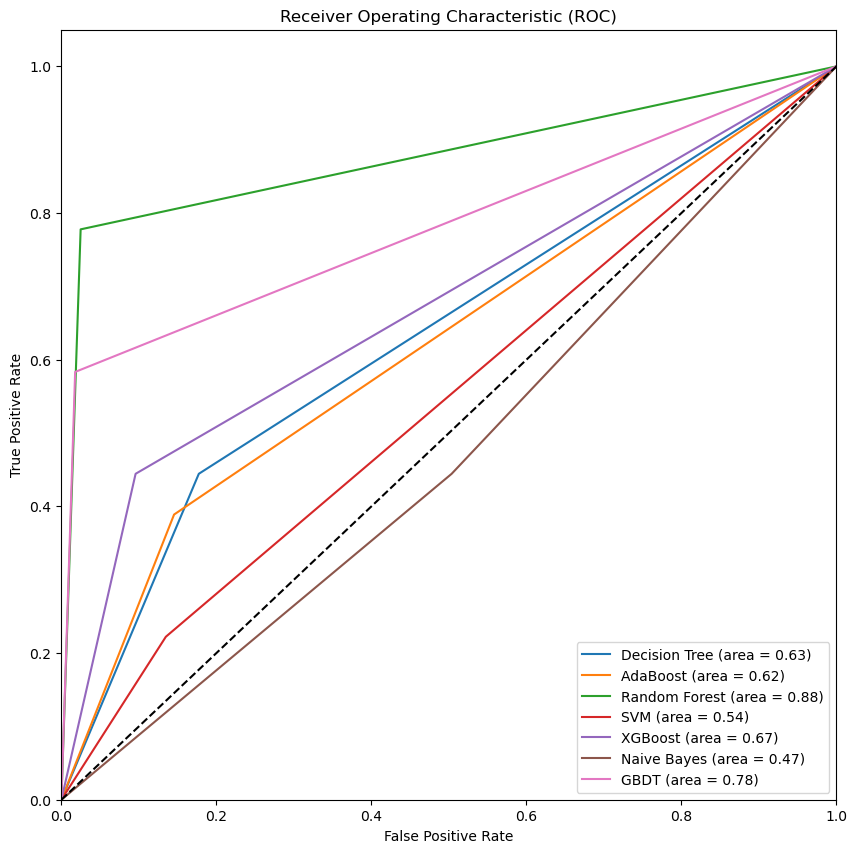

In [70]:
# plot auc-roc curve for all the models. AUC-ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. AUC-ROC curve is plotted True Positive Rate (y-axis) against the False Positive Rate (x-axis). AUC-ROC means Area Under the Curve of Receiver Operating Characteristics. 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_grid.predict(X_test))
dt_roc_auc = auc(dt_fpr, dt_tpr)

# AdaBoost
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_grid.predict(X_test))
ada_roc_auc = auc(ada_fpr, ada_tpr)

# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_grid.predict(X_test))
rf_roc_auc = auc(rf_fpr, rf_tpr)

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_grid.predict(X_test))
svm_roc_auc = auc(svm_fpr, svm_tpr)

# XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_grid.predict(X_test))
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Naive Bayes
naive_bayes_fpr, naive_bayes_tpr, _ = roc_curve(y_test, naive_bayes_grid.predict(X_test))
naive_bayes_roc_auc = auc(naive_bayes_fpr, naive_bayes_tpr)

# GBDT
gbdt_fpr, gbdt_tpr, _ = roc_curve(y_test, gbdt_grid.predict(X_test))
gbdt_roc_auc = auc(gbdt_fpr, gbdt_tpr)

plt.figure(figsize=(10, 10))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (area = {dt_roc_auc:.2f})')
plt.plot(ada_fpr, ada_tpr, label=f'AdaBoost (area = {ada_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (area = {rf_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (area = {svm_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (area = {xgb_roc_auc:.2f})')
plt.plot(naive_bayes_fpr, naive_bayes_tpr, label=f'Naive Bayes (area = {naive_bayes_roc_auc:.2f})')
plt.plot(gbdt_fpr, gbdt_tpr, label=f'GBDT (area = {gbdt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Create a Train Test Split

In [71]:
random_state = 10

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=random_state)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

739 318 739 318


## Load Saved Models

In [72]:
dt_model = joblib.load('./models/challa_decision_tree.sav')
lr_model = joblib.load("./models/challa_logistic_regression.sav")
rf_model = joblib.load('./models/challa_random_forest.sav')
xgb_model = joblib.load('./models/challa_XGBoost_model.sav')
svm_model = joblib.load('./models/challa_SVM_model.sav')
ada_model = joblib.load('./models/challa_AdaBoost_model.sav')
naive_bayes_model = joblib.load('./models/challa_naive_bayes_model.sav')
gbdt_model = joblib.load('./models/challa_gbdt_model.sav')

**Dictionary `'models'`**

In [73]:
# Create models dictionary, it will be needed for ploting
models = {
    'dt' : 'Decision Tree',
    'lr' : 'Logistic Regression',
    'rf' : 'Random Forest',
    'xgb' : 'XGBoost',
    'ada' : 'AdaBoost',
    'svm' : 'Support Vector Machine (SVM)',
    'naive_bayes' : 'Naive Bayes',
    'gbdt' : 'Gradient Boosting Decision Tree (GBDT)'

    }

**Dictionary `'loaded_models'`**

In [74]:
# Dictionary of all loaded models
loaded_models = {
    'dt' : dt_model,
    'lr' : lr_model,
    'rf' : rf_model,
    'xgb' : xgb_model,
    'ada' : ada_model,
    'svm' : svm_model,
    'naive_bayes' : naive_bayes_model,
    'gbdt' : gbdt_model
    }

### Helper Functions

**The function for creating the dataframe with evaluation metrics for each model.**

<pre>input: loaded models dictionary
output: evaluation metrics dataframe</pre>

In [75]:
def evaluation_test(fit_models):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)
        test_accuracy = model.score(X_test, y_test)
        # calculate true positive, false positive, true negative, false negative
        true_positive = confusion_matrix(y_test, pred)[0][0]
        false_positive = confusion_matrix(y_test, pred)[0][1]
        true_negative = confusion_matrix(y_test, pred)[1][0]
        false_negative = confusion_matrix(y_test, pred)[1][1]
        # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1_score = 2 * (precision * recall) / (precision + recall)
        sensitivity = true_positive / (true_positive + false_negative)
        specificity = true_negative / (true_negative + false_positive)
        auc = roc_auc_score(y_test, pred)
        lst.append([name, test_accuracy, precision, recall, f1_score, sensitivity, specificity, auc])
    eval_df = pd.DataFrame(lst, columns=['model', 'test_accuracy', 'precision', 'recall', 'f1_score', 'senstivity', 'specificity', 'auc'])
    eval_df.set_index('model', inplace = True)
    return eval_df

def evaluation_train(fit_models):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_train)
        train_accuracy = model.score(X_train, y_train)
        # calculate true positive, false positive, true negative, false negative
        true_positive = confusion_matrix(y_train, pred)[0][0]
        false_positive = confusion_matrix(y_train, pred)[0][1]
        true_negative = confusion_matrix(y_train, pred)[1][0]
        false_negative = confusion_matrix(y_train, pred)[1][1]
        # calculate precision, recall, f1-score, sensitivity, specificity and auc score using true positive, false positive, true negative, false negative
        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1_score = 2 * (precision * recall) / (precision + recall)
        sensitivity = true_positive / (true_positive + false_negative)
        specificity = true_negative / (true_negative + false_positive)
        auc = roc_auc_score(y_train, pred)
        lst.append([name, train_accuracy, precision, recall, f1_score, sensitivity, specificity, auc])
    eval_df = pd.DataFrame(lst, columns=['model','train_accuracy', 'precision', 'recall', 'f1_score', 'senstivity', 'specificity', 'auc'])
    eval_df.set_index('model', inplace = True)
    return eval_df

### Display evaluation metrics

In [76]:
# print the results of the best model from evaluation_test 
df = evaluation_test(loaded_models)
df.sort_values(by='test_accuracy', ascending=False)

,test_accuracy,precision,recall,f1_score,senstivity,specificity,auc
model,,,,,,,
rf,0.827044,0.904255,0.969582,0.935780,0.969582,0.509091,0.563239
svm,0.776730,0.851064,0.971660,0.907372,0.971660,0.408451,0.522754
dt,0.720126,0.790780,0.973799,0.872798,0.973799,0.337079,0.478723
lr,0.547170,0.546099,0.885057,0.675439,0.885057,0.111111,0.550827
gbdt,0.539931,0.932624,0.981343,0.956364,0.981343,0.620000,0.535757
ada,0.517487,0.812057,0.962185,0.880769,0.962185,0.337500,0.531028
xgb,0.489049,0.840426,0.979339,0.904580,0.979339,0.407895,0.489657
naive_bayes,0.397635,0.503546,0.904459,0.646925,0.904459,0.130435,0.460106
